In [30]:
import numpy as np
from igraph import Graph
from operator import itemgetter
import networkx as nx

%matplotlib inline

In [167]:
g = Graph(directed=True)

In [168]:
g.add_vertex('alice')
g.add_vertex('bob')
g.add_vertex('carol')
g.add_vertex('dan')

In [169]:
player_scores = {
    'alice': 3,
    'bob': 10,
    'carol': 8,
    'dan': 1
}

In [170]:
sorted_scores = list(reversed(sorted(player_scores.items(), key=itemgetter(1))))

In [171]:
sorted_scores

[('bob', 10), ('carol', 8), ('alice', 3), ('dan', 1)]

In [172]:
scores = np.array([a[1] for a in sorted_scores])

In [173]:
indices = np.triu_indices(len(scores), k=1)

In [174]:
pairwise_diffs = scores[indices[0]] - scores[indices[1]]

In [175]:
pairwise_diffs

array([2, 7, 9, 5, 7, 2])

In [176]:
for (a,b,weight) in zip(indices[0], indices[1], pairwise_diffs):
    id_a = sorted_scores[a][0]
    id_b = sorted_scores[b][0]
    node_a = g.vs.find(name=id_a)
    node_b = g.vs.find(name=id_b)
    g.add_edge(node_b, node_a, weight=weight)

In [177]:
g.pagerank(weights='weight')

[0.1511512575557646,
 0.47344822597880265,
 0.2372927684449371,
 0.13810774802049558]

In [178]:
A = np.array(g.get_adjacency(attribute='weight').data)

In [179]:
A

array([[0, 7, 5, 0],
       [0, 0, 0, 0],
       [0, 2, 0, 0],
       [2, 9, 7, 0]])

In [180]:
ng = nx.from_numpy_matrix(A)

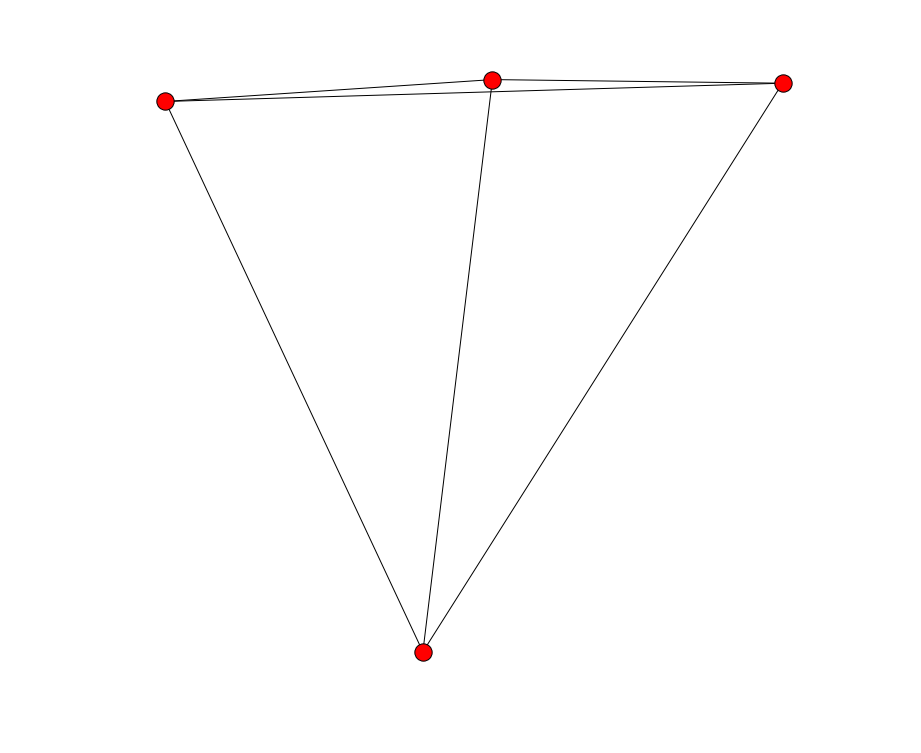

In [181]:
nx.draw(ng)

In [77]:
player_scores = {
    'alice': 6,
    'bob': 3,
    'carol': 6,
    'dan': 7
}
sorted_scores = list(reversed(sorted(player_scores.items(), key=itemgetter(1))))
scores = np.array([a[1] for a in sorted_scores])
indices = np.triu_indices(len(scores), k=1)
pairwise_diffs = scores[indices[0]] - scores[indices[1]]
for (a,b,weight) in zip(indices[0], indices[1], pairwise_diffs):
    id_a = sorted_scores[a][0]
    id_b = sorted_scores[b][0]
    node_a = g.vs.find(name=id_a)
    node_b = g.vs.find(name=id_b)
    g.add_edge(node_b, node_a, weight=weight)

In [78]:
zip(indices[0], indices[1], pairwise_diffs)

[(0, 1, 1), (0, 2, 1), (0, 3, 4), (1, 2, 0), (1, 3, 3), (2, 3, 3)]

In [99]:
g.pagerank(weights='weight', damping=0.9)

[0.19690587284318892,
 0.3017095235235027,
 0.29735161760798695,
 0.20403298602532152]

In [92]:
A = np.array(g.get_adjacency(attribute='weight').data)

In [93]:
A

array([[  0,   2,   5,   1],
       [  3,   0,   3,   4],
       [  0, 100,   0,   1],
       [  2,   1,   7,   0]])

In [94]:
ng = nx.from_numpy_matrix(A)

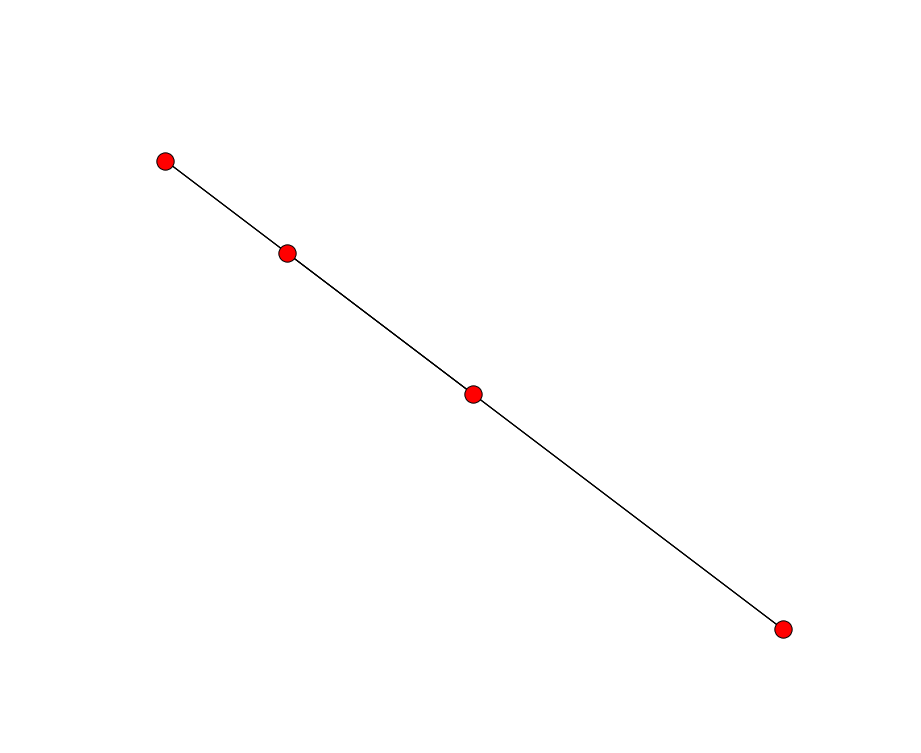

In [100]:
nx.draw(ng)

In [104]:
node_a, node_b

(igraph.Vertex(<igraph.Graph object at 0x10d863ed8>,2,{'name': 'carol'}),
 igraph.Vertex(<igraph.Graph object at 0x10d863ed8>,1,{'name': 'bob'}))

In [108]:
g.add_edge(node_a, node_b, weight=0)

In [109]:
list(g.es)

[igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 0, {'weight': 2}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 1, {'weight': 7}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 2, {'weight': 9}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 3, {'weight': 5}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 4, {'weight': 7}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 5, {'weight': 2}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 6, {'weight': 1}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 7, {'weight': 2}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 8, {'weight': 2}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 9, {'weight': 1}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 10, {'weight': 1}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 11, {'weight': 0}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 12, {'weight': 1}),
 igraph.Edge(<igraph.Graph object at 0x10d863ed8>, 13, {'weight': 1}),
 igraph.Edge(<ig

In [110]:
np.array(g.get_adjacency(attribute='weight').data)

array([[0, 2, 5, 1],
       [3, 0, 3, 4],
       [0, 0, 0, 1],
       [2, 1, 7, 0]])

In [111]:
g.pagerank()

[0.24917887851420678,
 0.24917887851420678,
 0.26702020615752237,
 0.2346220368140641]

In [143]:
node_b.index

1

In [138]:
g.vs.find(name='bob')

igraph.Vertex(<igraph.Graph object at 0x10d863ed8>,1,{'name': 'bob'})

In [153]:
len(g.es.select(_source=2, _target=1))

7

In [118]:
asdf = Graph(directed=True)

In [119]:
asdf.add_vertex('alice')
asdf.add_vertex('bob')
asdf.add_vertex('carol')
asdf.add_vertex('dan')

In [122]:
asdf[0,3]

0

In [123]:
list(asdf.es)

[]